# WEEK 3 

# Bias Variance Tradeoff

Bias : Bias refers to systematic error that model introduce because it cannot capture the true realtionship in the data. 
    It represents the difference between the expected Prediction of our model and the correct value which we are trying to 
    predict. More bias leads to underfitting, where the model doesn't fit the train data well. 

Variance: Variance refers to the amount by which the prediction of our model will change if we used a different training data
    set. In other words, it measures the how much the prediction of the given point vary between different realizations of 
    the models. 

    
There is a tradeoff between bias and variance. If we try to decrease the bias the variance will increase and if we try to 
decrease the variance the bias will increase. 

<b> Bias Variance Decomposition </b> 

Bias Variance Decomposition is a way of analysing the learning algorrithm's expected generalization error with respect to a 
particular by expressing it as the sum of three different quantities: Bias, Variance and Irreducible error.


<b> Regularization </b>

 loss = (bias)^2 + variance + noise 
 
 we cannot do anything to noise. We can reduce bias by implementing the complex models such as decision tree, polynomial regression and neural networks with lots of nodes.But due to bias variance tradeoff when we try to decrease the bias the variance increase. so in simple term the regularization is the technique of reducing  overfitting in 
 complex models.
 
<B> when to use Regualrization ? </B>

i. To prevent overfitting 
ii. High dimensionality
iii. Multicollinearity
iv. Feature selection 

Most of the engineer uses regualrization by default in their module as using this have no any bad effect.


# Ridge Regression ( L2)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data = load_diabetes()


In [2]:
x = data.data
y = data.target

In [3]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
X_train.shape

(331, 10)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [5]:
y_predict = lr.predict(X_test)

In [6]:
r2= r2_score (y_test, y_predict)
print(f'The r2 score is {r2}')
print (f'The mean squared error is {np.sqrt(mean_squared_error(y_test, y_predict))}')

The r2 score is 0.35940880381777074
The mean squared error is 56.392904235868585


In [7]:
from sklearn.linear_model import Ridge
R= Ridge(alpha=0.0001)
R.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [8]:
y_predict = R.predict(X_test)
print(f'The r2_socre is {r2_score(y_test, y_predict)}')
print(f'The mean squared error is {np.sqrt(mean_squared_error(y_test, y_predict))}')

The r2_socre is 0.3593218833156824
The mean squared error is 56.3967300246989


In [9]:
#Example no.2 
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1,  noise = 20, random_state = 10)

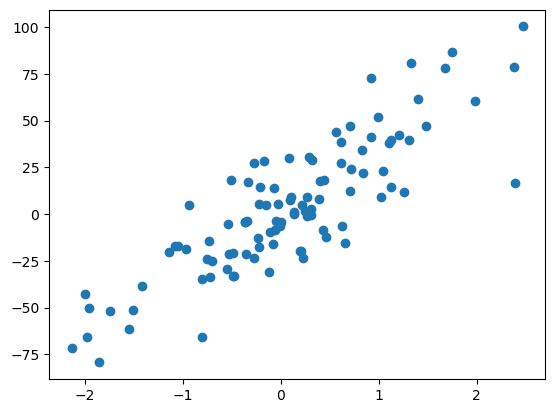

In [10]:
plt.scatter(X,y)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[31.34493951]
1.0560830217516393


In [12]:
from sklearn.linear_model import Ridge
Rr = Ridge(alpha = 100)
Rr.fit(X,y)
print(Rr.coef_)
print(Rr.intercept_)

[15.14738848]
2.342438471999782


In [13]:
#Ridge regression with gradient descent 

RG = Ridge(alpha= 100, max_iter = 1000, solver = 'sparse_cg')
RG.fit(X,y)
print(RG.coef_)
print(RG.intercept_)

[15.14738848]
2.342438471999782


# Lasso Rigression(L1)

In [14]:
from sklearn.linear_model import Lasso
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state =0)
lasso = Lasso(alpha= 10)
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [15]:
print(lasso.coef_)
print(lasso.intercept_)

[18.68673634]
3.194193096464755


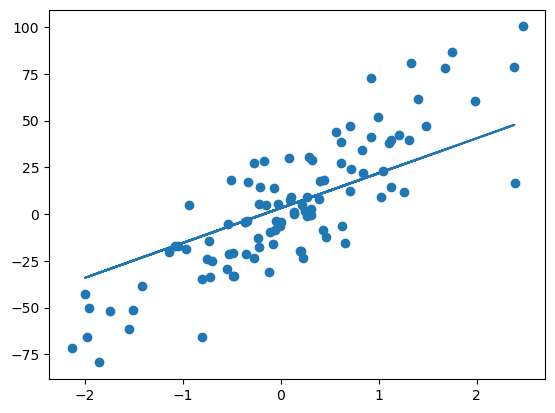

In [16]:
plt.scatter(X,y)
plt.plot(X_test, lasso.predict(X_test))

<function matplotlib.pyplot.show(close=None, block=None)>

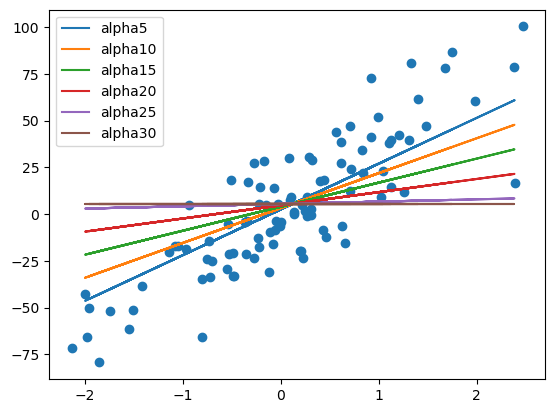

In [17]:
alpha = [5, 10, 15, 20, 25, 30]
plt.scatter(X,y)
for i in alpha:
    lR= Lasso(alpha = i)
    lR.fit(X_train, y_train)
    plt.plot(X_test,  lR.predict(X_test), label= "alpha{}".format(i))
    
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

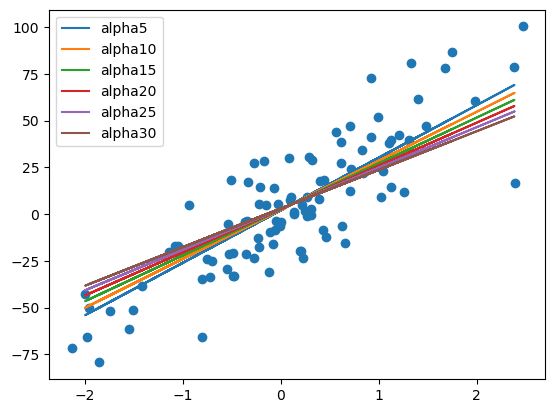

In [18]:
# alpha = [50, 100, 150, 200, 250, 300]
plt.scatter(X,y)
for i in alpha:
    lR= Ridge(alpha = i)
    lR.fit(X_train, y_train)
    plt.plot(X_test,  lR.predict(X_test), label= "alpha{}".format(i))
    
plt.legend()
plt.show

Here we can clearly see that Lasoo Regression makes the slope of the prediction line zero for higher value of the alpha but the 
Ridge regression cannot make the the slope completely zero of line. So Lasso Regression performed the feature selection internally
for the high dimensionality data  as this remove the columns which are not too much important. 


# ElasticNet Regression

If we have the large set of data where we are confused about using the lasso regression and ridge regression. Then we use
ElasticNet Regression.

# K Nearest Neighbor Algorithm

K Nearest Neighbors algorithm is the simplest algorithm that which does prediction by looking at the neighbors. How many numbers
of neigbhors should be specified by the users. Generally it is taken square root of n but we can test and give it of our own.

In [19]:
import pandas as pd
kdata = pd.read_csv("datasets/breast_cancer.csv")
kdata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
kdata.drop(columns = ["id"], inplace  = True)

In [21]:
kdata.head()

for i in kdata.columns:
    if kdata[i].dtypes== "object":
        continue
    if kdata[i].isnull:
        kdata[i].fillna(kdata[i].median())
        
        
kdata

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
X= kdata.drop("diagnosis", axis =1 )
y = kdata["diagnosis"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y ,test_size = 0.25, random_state =2)

In [23]:
X_train.shape

(426, 30)

In [24]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [26]:
y_predict = knn.predict(X_test)
y_predict
from sklearn.metrics import accuracy_score

auu = accuracy_score(y_test, y_predict)
auu

0.972027972027972

# Decision Surface

Decisoin Surface is the tool for understanding performance of the Classification algorithms. It is used for all classification 
algos such as SVM, Logastic Regression , Neural Networks etc. 

# Overfitting and underfitting in KNN 


When the value of k_neighbors is 1 or 2 then the overfitting occures as the decision surface is divided into smaller smaller
portion. When the k value is very high then under fitting will occurs and the result will be of the dominant class. 

Limitation of the KNN : 
1. large datasets  : for example if we have datasets in lakhs we don't go for KNN algorithm. KNN is a 
    lazy learning technique(don't perform any task during the training phase but does everything in the prediction phase). 
    training will be very fast as we don't do anything here  but the prediction for large datasets is very high as everything 
    is done here. 
                            
2. High dimensional datasets : According to curse of the dimensionality the models which depends upon the distance aren't the 
    good model for the large features data.
                            
3. Robust to outliers 

4. Non Homogeneous Feautre Scale : If we have different scale we should bring it in same. 

5. Imbalance datasets : The output should not be embalance the output should be balance that means if only one output is present
    in the large amount then KNN fails to give the correct output. 
    
6. Not good for inferencial only good for prediction 
